# Melbourne Housing Price Prediction

This project was created as an addition to my Machine Learning guide

Melbourne housing clearance data from Jan 2016 [Kaggle](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)

### About Dataset

Update 06/08/2018 - Well it finally happened, Melbourne housing has cooled off. So here's your challenge; 1) when did it exactly happen? , 2) Could you see it slowing down? What were the variables that showed the slowing down (was it overall price, amount sold vs unsold, change in more rentals sold and less housing, changes in which CouncilArea or Region, more houses sold in distances further away from Melbourne CBD and less closer)? 3) Could you have predicted it (I'm not sure how you would do this, but I'm sure you magicians have a way that would make me think we should burn you for being a witch) 4) Should I hold off even longer in buying a two bedroom apartment in Northcote? <-- This is the real reason for me in publishing this dataset :)


### Import Libraries

In [36]:
# Import libraries and packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Read in data

In [37]:
# Read in csv
melbourne_df = pd.read_csv('../Data/Melbourne_housing_FULL.csv')
melbourne_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Exploratory Data Analysis

In [38]:
melbourne_df.shape

(34857, 21)

In [39]:
melbourne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [40]:
melbourne_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [41]:
melbourne_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [42]:

melbourne_df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [43]:
melbourne_df_na = (melbourne_df.isnull().sum() / len(melbourne_df)) * 100
melbourne_df_na = melbourne_df_na.drop(melbourne_df_na[melbourne_df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :melbourne_df_na})
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Feature'}, inplace=True)
missing_data

,Feature,Missing Ratio
0,BuildingArea,60.576068
1,YearBuilt,55.386293
2,Landsize,33.881286
3,Car,25.039447
4,Bathroom,23.599277
5,Bedroom2,23.573457
6,Lattitude,22.882061
7,Longtitude,22.882061
8,Price,21.832057
9,CouncilArea,0.008607


Text(0.5, 1.0, 'Percent missing data by feature')

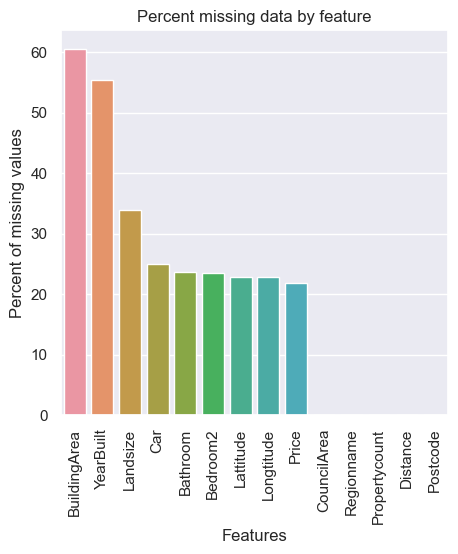

In [44]:
f, ax = plt.subplots(figsize=(5, 5))
plt.xticks(rotation='90')
sns.barplot(data=missing_data, x='Feature', y='Missing Ratio')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percent of missing values', fontsize=12)
plt.title('Percent missing data by feature', fontsize=12)

In [45]:
melbourne_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


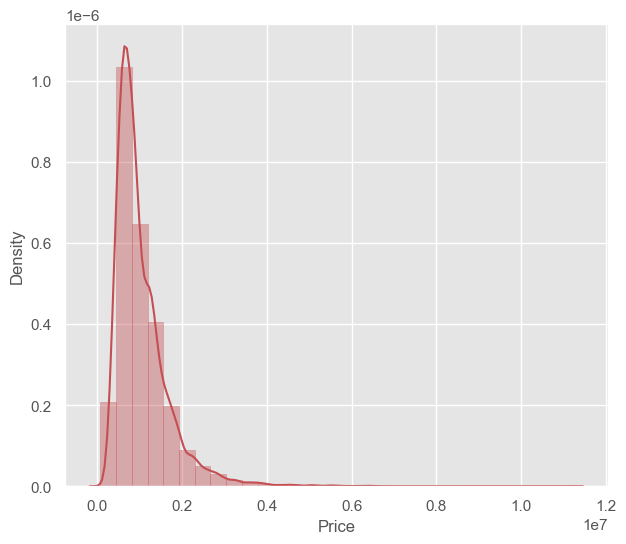

In [46]:
plt.figure(figsize=(7,6))
plt.style.use('ggplot')
sns.distplot(melbourne_df['Price'], bins=30, color="r", hist_kws=dict(edgecolor="r"))
plt.show()

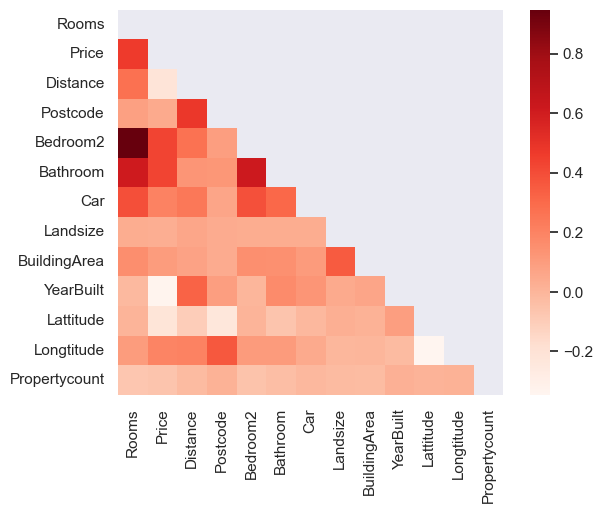

In [47]:
# Using Pearson Correlation to find relation between our target and features
corr = melbourne_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap='Reds')


In [48]:
corr_target = abs(corr["Price"])
top_features = corr_target[corr_target>0.2]
top_features.sort_values(ascending=False)

Price        1.000000
Rooms        0.465238
Bedroom2     0.430275
Bathroom     0.429878
YearBuilt    0.333306
Lattitude    0.215607
Distance     0.211384
Car          0.201803
Name: Price, dtype: float64

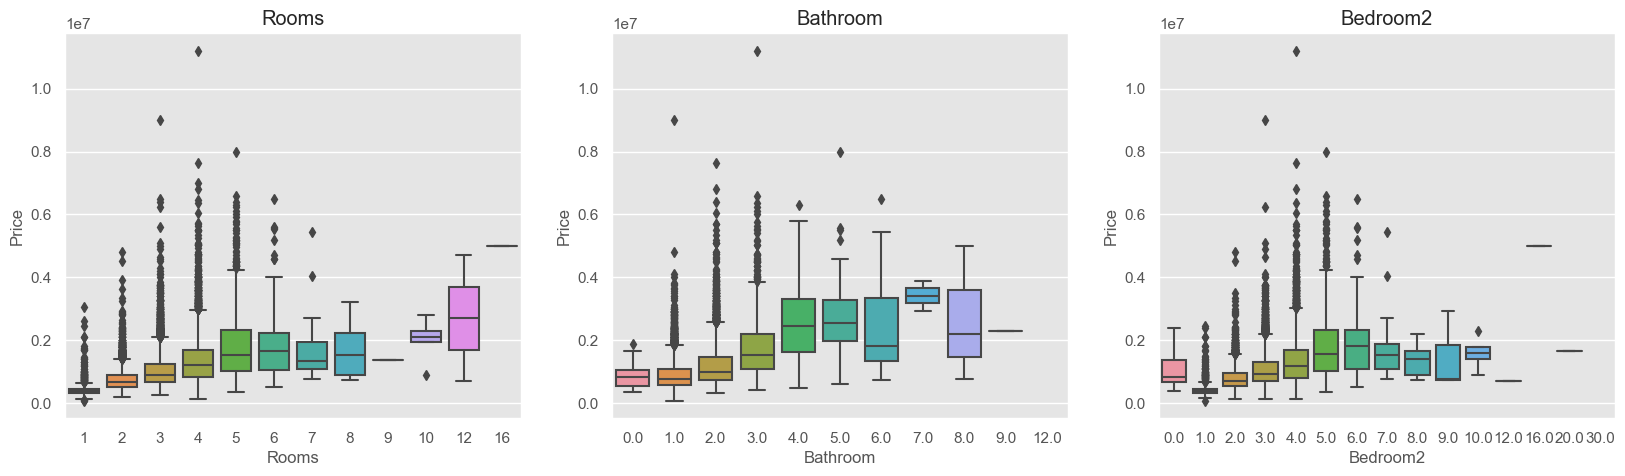

In [57]:
plt.figure(figsize=(20, 5))
plt.style.use('ggplot')

features = ['Rooms', 'Bathroom', 'Bedroom2']
target = melbourne_df['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = melbourne_df[col]
    y = target
    sns.boxplot(data = melbourne_df, x=x, y=y)
    plt.title(col)
    plt.xlabel(col)

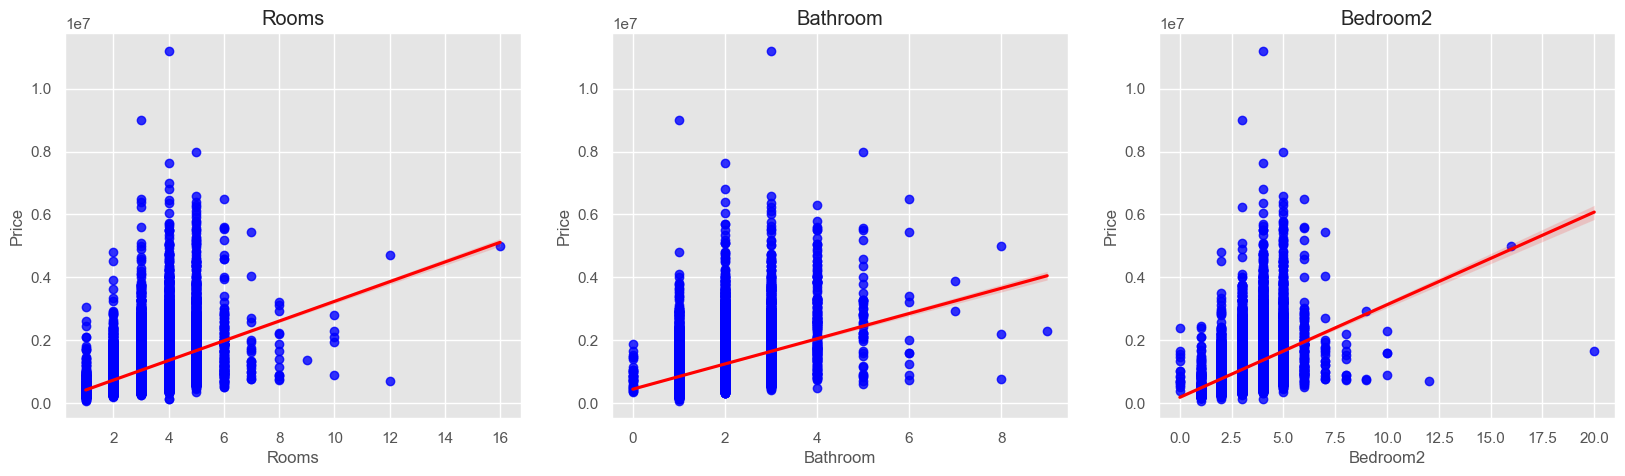

In [52]:
plt.figure(figsize=(20, 5))
plt.style.use('ggplot')

features = ['Rooms', 'Bathroom', 'Bedroom2']
target = melbourne_df['Price']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = melbourne_df[col]
    y = target
    sns.regplot(data=melbourne_df, x=x, y=y,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title(col)
    plt.xlabel(col)


###  Data Preprocessing

In [53]:
melbourne_features = melbourne_df.drop(['Price'],axis=1)
melbourne_features = melbourne_features[['Rooms', 'Bathroom', 'Bedroom2', 'Type', 'Distance', 'Car', 'Regionname']]

num_cols = [col for col in melbourne_features.columns if melbourne_features[col].dtype in ['float64','int64']]
cat_cols = [col for col in melbourne_features.columns if melbourne_features[col].dtype not in ['float64','int64']]


In [54]:
# Impute missing values with mean
melbourne_features[num_cols] = SimpleImputer().fit_transform(melbourne_features[num_cols])

# Scale numerical data
melbourne_features[num_cols] = MinMaxScaler().fit_transform(melbourne_features[num_cols])

# Encode categorical data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(melbourne_features[cat_cols])
encoded_cols = list(encoder.get_feature_names(cat_cols))
melbourne_features[encoded_cols] = encoder.transform(melbourne_features[cat_cols])

In [55]:
melbourne_features.head()

,Rooms,Bathroom,Bedroom2,Type,Distance,Car,Regionname,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Regionname_nan
0,0.066667,0.083333,0.066667,h,0.051975,0.038462,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.066667,0.083333,0.066667,h,0.051975,0.038462,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.066667,0.083333,0.066667,h,0.051975,0.000000,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.133333,0.166667,0.100000,u,0.051975,0.038462,Northern Metropolitan,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133333,0.166667,0.100000,h,0.051975,0.000000,Northern Metropolitan,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Select Target and Features 
X = melbourne_features[num_cols + encoded_cols]
y = melbourne_df.Price